# 1) Importing Libraries

In [1]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

# 2)Set Options


The below is optional

. Display complete data frames
. To avoid the exponential number

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# 3)Read Data

In [3]:
df_vaccine = pd.read_csv("D:\Data Analytics\Project\Project 3\logistic_regression\h1n1_vaccine_prediction.csv")

In [4]:
df_vaccine.head(50)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [5]:
df_vaccine.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
df_vaccine.shape

(26707, 34)

Change the dataypes of variable with the Problem statment

# 4. Data Analysis and Preparation

Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and prepare data to perform classification techniques:
1. Check data types. Ensure your data types are correct. Refer data definitions to validate
2. If data types are not as per business definition, change the data types as per requirement
3. Study summary statistics
4. Distribution of variables
5. Study correlation
6. Detect outliers
7. Check for missing values

Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area

# 4.1 Understand the Dataset

In [7]:
df_vaccine.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

The variables like 'h1n1_worry', 'h1n1_awareness' etc are identified as float. But as per data attribute information we have, 'these variables are categorical, which are wrongly interpreted as float, so we convert these variables' data type to 'object'.

# 4.2 Change the incorrect data type.

In [8]:
# use 'for' loop to change the data type of variables 
for col in ['h1n1_worry','h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask',
            'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 
            'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition','cont_child_undr_6_mnths',
           'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 
            'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']:
    
    df_vaccine[col] = df_vaccine[col].astype('object')

In [9]:
df_vaccine.dtypes

unique_id                     int64
h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
dr_recc_h1n1_vacc            object
dr_recc_seasonal_vacc        object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
has_health_insur             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

Deleting the "unique_id" column as it can't do anything in our perdiction                   

In [10]:
df_vaccine.drop('unique_id',axis = 1, inplace = True)

In [11]:
# df_vaccine.head(10)

It is a common practice that we have to split the target and features (independent variables)

In [12]:
df_features = df_vaccine.iloc[:,df_vaccine.columns != 'h1n1_vaccine'] # Spearate the independent variables / features

In [13]:
df_target = df_vaccine.iloc[:,df_vaccine.columns == 'h1n1_vaccine'] # Sperate the target variable

In [14]:
df_target.shape

(26707, 1)

In [15]:
df_features.shape

(26707, 32)

# 4.3 Summary Statistics

For categorical variables, using the describe()

In [16]:
df_features.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26615.0,26591.0,26636.0,26499.0,26688.0,26665.0,26620.0,26625.0,26579.0,24547.0,24547.0,25736.0,25887.0,25903.0,14433.0,26316.0,26319.0,26312.0,26245.0,26193.0,26170.0,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.0,26458.0
unique,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4,4,2,3,2,2,3,3,4.0,4.0
top,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
freq,10575.0,14598.0,25335.0,19228.0,24847.0,22015.0,17073.0,17644.0,18001.0,19139.0,16453.0,18446.0,23749.0,23004.0,12697.0,11683.0,9919.0,9129.0,11629.0,8954.0,11870.0,6843,10097,21222,15858,12777,13555,18736,13560,11645,14474.0,18672.0


In [17]:
df_features.shape

(26707, 32)

In [18]:
df_features.describe().transpose() # For better understanding we transpose the data

,count,unique,top,freq
h1n1_worry,26615.0,4.0,2.0,10575.0
h1n1_awareness,26591.0,3.0,1.0,14598.0
antiviral_medication,26636.0,2.0,0.0,25335.0
contact_avoidance,26499.0,2.0,1.0,19228.0
bought_face_mask,26688.0,2.0,0.0,24847.0
wash_hands_frequently,26665.0,2.0,1.0,22015.0
avoid_large_gatherings,26620.0,2.0,0.0,17073.0
reduced_outside_home_cont,26625.0,2.0,0.0,17644.0
avoid_touch_face,26579.0,2.0,1.0,18001.0
dr_recc_h1n1_vacc,24547.0,2.0,0.0,19139.0


The summary contains information about the total number of observations, number of unique classes, the most occurring class and frequency of the same.

Let us consider the 'h1n1_worry' variable to see the statistics-

count: Number of observations i.e., 26615

unique: Number of unique values or classes in the variable i.e., it has 4 classes in it

top: The most occurring class in this variable is 2

frequency: Frequency of the most repeated class; out of 20000 observations 0 has a frequency of 10575

#  4.4 Distribution of variables

Check the distribution of all the variables

1. Distribution of numeric independent variables
2. Distribution of categoric independent variables
3. Distribution of dependent variable

**Distribution of numeric independent variables**

Since there is no numeric independent variables we don't have anything to plot.

**Distribution of categoric independent variables**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

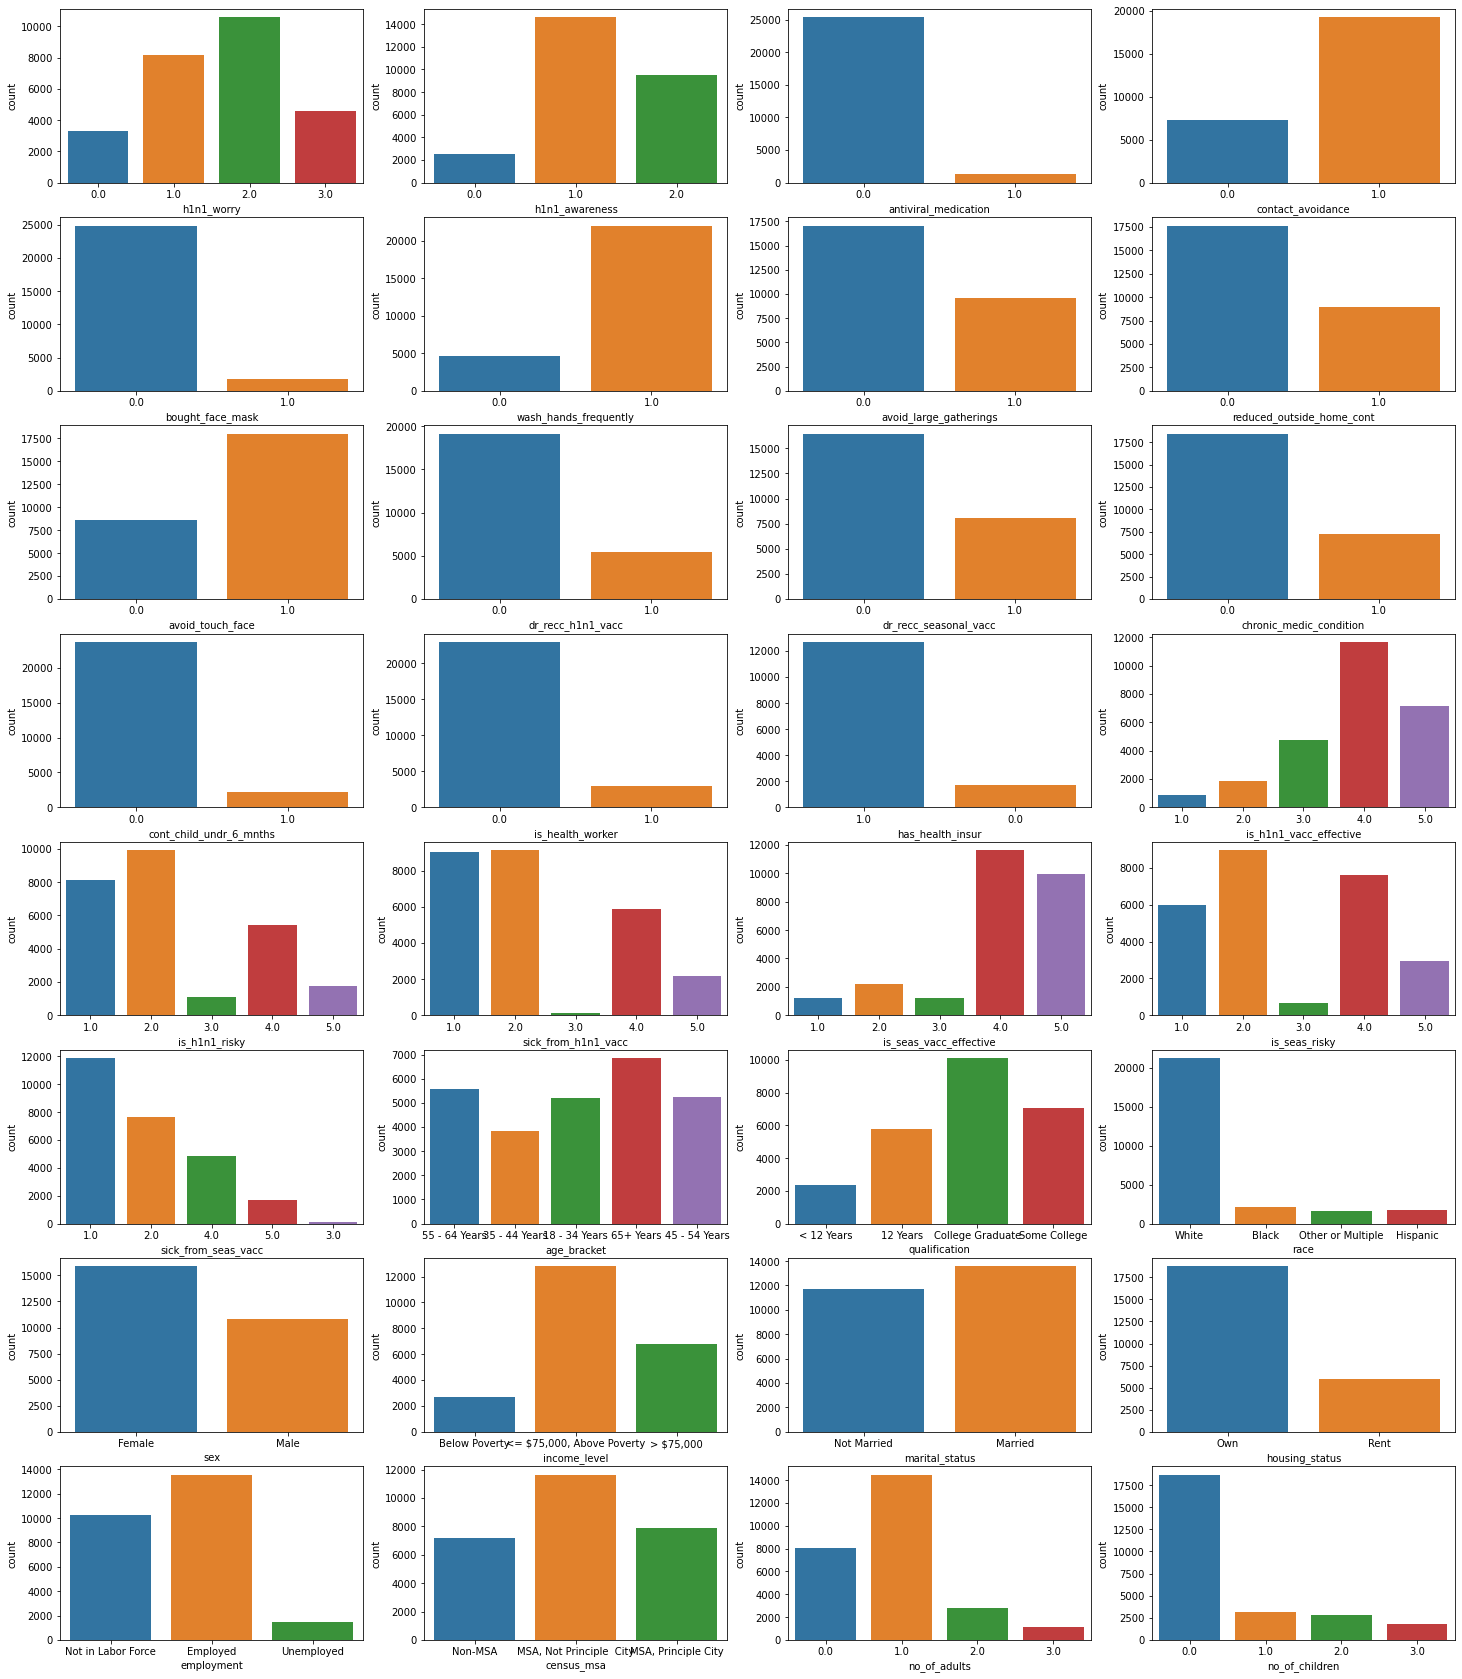

In [19]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_features:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_features[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 8, ncols = 4, figsize=(25, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df_vaccine[variable], ax = subplot)

# display the plot
plt.show()

**Distribution of dependent variable**

In [20]:
# get counts of 0's and 1's in the 'h1n1_vaccine' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target['h1n1_vaccine'].value_counts()
class_frequency

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

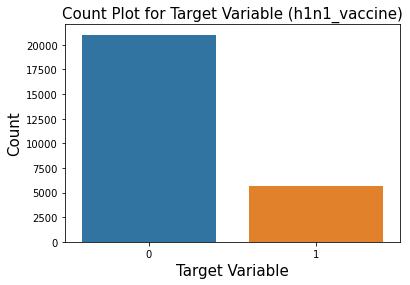

In [21]:
sns.countplot(x = df_target.h1n1_vaccine)
plt.title('Count Plot for Target Variable (h1n1_vaccine)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

	
There are a total of 26707 respondents who do not have taken the survey, and 5674 have taken the h1n1 flu vaccine. We see that the data set is imbalanced between the two classes of the target variable.

# 4.5 Correlation

Since all the features are categorical we can't do the Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near 1 indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated. Since all the independent variables are categorical variables, we skip this step.

# 4.6 Missing Values

In [22]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_vaccine.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_vaccine.isnull().sum()*100/df_vaccine.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
has_health_insur,12274,45.957989
income_level,4423,16.561201
dr_recc_h1n1_vacc,2160,8.087767
dr_recc_seasonal_vacc,2160,8.087767
housing_status,2042,7.645936
employment,1463,5.477965
marital_status,1408,5.272026
qualification,1407,5.268282
chronic_medic_condition,971,3.635751
cont_child_undr_6_mnths,820,3.070356


Only the variables 'age_bracket', 'race', 'sex', 'census_msa' and 'h1n1_vaccine' do not contain missing values. All other variables have missing values.

**We plot a heatmap for visualization of missing values**

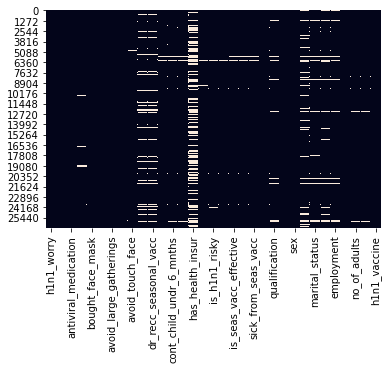

In [23]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df_vaccine.isnull(), cbar=False)

# display the plot
plt.show()

The horizontal lines in the heatmap correspond to the missing values.

How to deal with missing data?

Drop data
a. Drop the whole row
b. Drop the whole column


Replace data

a. Replace it by mean

b. Replace it by frequency
c. Replace it based on other functions


Whole columns should be dropped only if most entries in the column are empty. In our dataset, column has_health_insur has almost 46% missing values. Column income_level has 16% missing values. Hence dropping these two columns. Also columns dr_recc_h1n1_vacc and dr_recc_seasonal_vacc have 8% missing values. Has these two columns mostly tell about doctor's recommendation and not about the respondents, I choose to drop these two columns as well. 

In [24]:
df_vaccine.drop(['has_health_insur','income_level','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc'], axis=1, inplace=True)

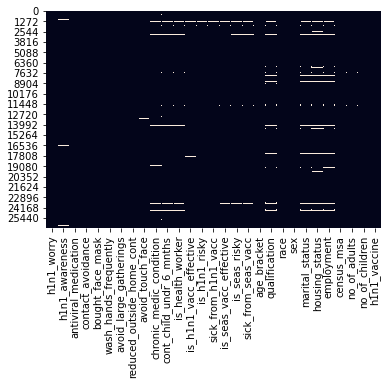

In [25]:
sns.heatmap(df_vaccine.isnull(), cbar=False)
plt.show()

In [26]:
df_vaccine.dropna(axis=0, inplace=True) # Delete entire row of missing values

In [27]:
df_vaccine.shape

(23426, 29)

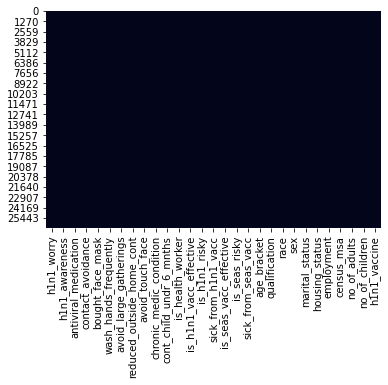

In [28]:
sns.heatmap(df_vaccine.isnull(), cbar=False)
plt.show()

In [29]:
# recheck the null values
# 'isnull().sum()' returns the number of missing values in each variable
df_vaccine.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

# 5 Prepare the Data

To build the classification models, we need to encode the categorical variables using dummy encoding.

To dummy encode, we do the following:

1. Filter numerical and categorical variables
2. Dummy encode the categorical variables
3. Concatenate numerical and dummy encoded categorical variables

**Filter numerical and categorical variables**

There are no numerical variables except the dependent variable(h1n1_vaccine)

**Dummy encode the categorical variables**

In [30]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_vaccine:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_vaccine[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

In [31]:
# dataframe with categorical features
# 'categorical' contains a list of categorical variables
df_cat = df_vaccine[categorical]

# dataframe with numerical features
# use 'drop()' to drop the categorical variables
# 'axis = 1' drops the corresponding column(s)
df_num = df_vaccine.drop(categorical, axis = 1)

In [32]:
df_num.head(25)

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [33]:
df_cat.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [34]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

In [35]:
# check the first five observations of the data with dummy encoded variables
df_cat_dummies.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


After removal of missing values and dummy encoding the data, the dataframe df_cat_dummies contains all the independent variables and the dataframe df_num contains the target variable. We will rename these dataframes as X and y respectively.

In [36]:
y = df_num.copy()
y.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [37]:
X = df_cat_dummies.copy() # X is the feature matrix
X.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [38]:
X.shape

(23426, 62)

# 6.Logistic Regression

Logistic regression is one of the techniques used for classification. The estimates of the parameters are obtained by maximizing the likelihood function.

1. Logistic Regression
2. Accuracy Measures
3. Understanding ROC and AUC

# Logistic Regression (using MLE)

To build the logistic model using Statsmodel, we do the following:

1. Introduce the intercept term
2. Split the data into training and test sets
3. Build the model
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

**Introduce the intercept term**

Statmodels logistic regression function (Logit) does not include the intercept term by default. Thus, we add the intercept column in the dataframe including features.

In [39]:
# add the intercept or constant column using 'add_constant()'
X = sm.add_constant(X)

# print the first five bservations after adding intercept
X.head()

,const,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,1.0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,1.0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


**Split the data into training and test sets**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# train_test_split() is imported from SKLearn Library

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (16398, 63)
y_train (16398, 1)
X_test (7028, 63)
y_test (7028, 1)


**Build a logistic regression model using statsmodels Logit()**

In [41]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
log_reg_model = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.414325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           h1n1_vaccine   No. Observations:                16398
Model:                          Logit   Df Residuals:                    16335
Method:                           MLE   Df Model:                           62
Date:                Mon, 15 Nov 2021   Pseudo R-squ.:                  0.1990
Time:                        23:13:16   Log-Likelihood:                -6794.1
converged:                       True   LL-Null:                       -8482.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.4648      0.297    -15.041     

LLR p-value is the value that we have to take for the above summary report. If LLR p-value is near to 0 then our weights / coefficient (coef) is good.

**Do predictions on the test set**

In [42]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

# The probability that is showing is when y=1

9480     0.193582
25478    0.663039
16789    0.091390
8036     0.121057
7121     0.156698
dtype: float64

In [43]:
y_test.head()

,h1n1_vaccine
9480,0
25478,1
16789,1
8036,1
7121,0


**Since the prediction is showing the probability when y = 1. Here row 9480 shows 19% probability for y = 1, that means it is having 81% probability for y = 0. So the prediction is correct. For row 1679 shows 9% probability for y = 1, means 91% probability for y=0. In our test data for row 1679, y is 1, which means the prediction is wrong. Like wise we have to check y-prediction with y-test.**

Since the target variable can take only two values either 0 or 1. We decide the threshold of 0.5. If y_pred_prob is less than 0.5, then consider it to be 0 else consider it to be 1.

We have seen that the dataset is not balanced. We may check model performance parameters for different threshold values to classify as 0 and 1. As an exercise check the impact on performance parameters for different threshold values.

In [44]:
type(y_pred_prob)

pandas.core.series.Series

In [45]:
y_pred_prob.shape

(7028,)

In [46]:
# convert probabilities to 0 and 1 using 'if_else'. Here we consider 0.5 as the threshold.

y_pred = [0 if i < 0.5 else 1 for i in y_pred_prob]

In [47]:
y_pred[:5]

[0, 1, 0, 0, 0]

In [48]:
# Convert the list to np.array for calculate the confusion matri

#y_pred = np.asarray(y_pred, dtype = np.float64)

**Calculate the performance measures**

**> Performance Measures using Confusion Matrix**

In [49]:
confusion_matrix(y_test, y_pred)

array([[5204,  272],
       [1037,  515]], dtype=int64)

In [50]:
# Accuracy of the model

(5204 + 515) / 7028

0.8137450199203188

81% is the accuracy of our model.
But this is not only the factors that we have to check, if our class is imbalanced. There may be cases that blind prediction got true. If it is the case our Accuracy will be on the higher side.

**> Performance Measures using ROC Curve (Receiver Operating Characteristic Curve)**

In [51]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Text(0, 0.5, 'True positive rate (Sensitivity)')

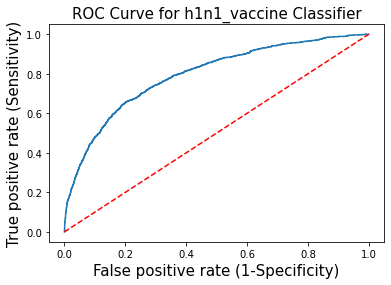

In [52]:
# plot the ROC curve
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1],'r--') # For ploting red dotted lines

plt.title('ROC Curve for h1n1_vaccine Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

**For finding Area Under the Curve (AUC) we are using fuction roc_auc_score() **

In [53]:
roc_auc_val = roc_auc_score(y_test, y_pred_prob)
round(roc_auc_val,4)

0.7944

AUC is just the percentage of box under the curve. 

The ROC curve works well only for balanced data. Here the 'y' data is not balanced.

If the data is imbalanced we use Precision-Recall Curve

**> Performance Measures using Precision & Recall Curve on test set**

In [54]:
# return the performace measures on test set

test_rep = classification_report(y_test, y_pred)

print(test_rep)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5476
           1       0.65      0.33      0.44      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.64      0.66      7028
weighted avg       0.79      0.81      0.79      7028



The accuracy is 81% for this model. Also, there is significant difference between specificity and sensitivity.

**> Performance Measures using Kappa Score**

In [55]:
cohen_kappa_score(y_test, y_pred)

0.3426774787926872

As the kappa score for the logistic regression is 0.3426, we can say that there is low to moderate agreement between the actual and predicted values.

**> Tabulate the results**

In [56]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

In [57]:
score_card = score_card.append({'Model': 'Logistic Regression',
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [58]:
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.794406,0.654384,0.33183,0.813745,0.342677,0.440359


# Logistic Regression (using SGD)

To build the logistic model on scaled features using SGD from sklearn, we do the following:

1. Scale the data
2. Split the data into training and test sets
3. Build the model
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

**Scale the data**

We do not need to scale the data, as all the varaibles are categorical variables.

**Split the data into training and test sets**

The same is already done on Logistic Regression using MLE

**Build the model using SGD**

In [59]:
SGD = SGDClassifier(loss = "log", random_state = 10)

The concrete loss function can be set via the loss parameter. SGDClassifier supports the following loss functions:

loss="hinge": (soft-margin) linear Support Vector Machine,

loss="modified_huber": smoothed hinge loss,

loss="log": logistic regression,

Set 'random_state' to generate the same dataset each time you run the code

In [60]:
log_reg_sgd = SGD.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [61]:
log_reg_sgd

SGDClassifier(loss='log', random_state=10)

**Predictions on the test set (SGD)**

In [62]:
y_pred_prob = log_reg_sgd.predict(X_test)

In [63]:
y_pred_prob[:5]

array([0, 1, 0, 0, 0], dtype=int64)

**Compute accuracy measures / Calculate the performance measures (SGD)**

**> Performance Measures using Confusion Matrix**

In [64]:
confusion_matrix(y_test,y_pred_prob)

array([[5253,  223],
       [1113,  439]], dtype=int64)

In [65]:
# Accuracy of the model

(5253 + 439) / 7028

0.8099032441661924

**> Performance Measures using ROC Curve (Receiver Operating Characteristic Curve)**

In [66]:
# roc_curve()

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_prob)

Text(0, 0.5, 'True positive rate (Sensitivity)')

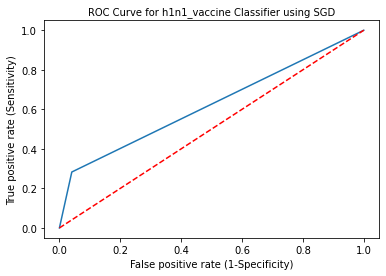

In [67]:
# plot the ROC curve
plt.plot(fpr_sgd, tpr_sgd)

plt.plot([0, 1], [0, 1],'r--') # For ploting red dotted lines

plt.title('ROC Curve for h1n1_vaccine Classifier using SGD', fontsize = 10)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 10)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 10)

Area Under the Curve (AUC)

In [68]:
roc_auc_val = roc_auc_score(y_test, y_pred_prob)
round(roc_auc_val,4)

0.6211

**> Performance Measures using Precision & Recall Curve on test set**

In [69]:
test_rep = classification_report(y_test, y_pred_prob)

print(test_rep)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5476
           1       0.66      0.28      0.40      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.62      0.64      7028
weighted avg       0.79      0.81      0.78      7028



The accuracy is 81% for this model. Also, there is significant difference between specificity and sensitivity.

**> Kappa Score**

In [70]:
cohen_kappa_score(y_test, y_pred_prob)

0.30475321107275866

The Cohen Kappa Score is very low for this model.

**> Tabulate the results**

In [71]:
score_card = score_card.append({'Model': 'Logistic Regression using SGD',
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred_prob),
                                    'Recall Score': metrics.recall_score(y_test, y_pred_prob),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_prob),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred_prob),
                                    'f1-score': metrics.f1_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)

In [72]:
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.794406,0.654384,0.331830,0.813745,0.342677,0.440359
1,Logistic Regression using SGD,0.621069,0.663142,0.282861,0.809903,0.304753,0.396567


# The above shows that the Logistic Regression(SGD) modela has lower values for Recall Score, Kappa score and F1-score when compared to the Logistic Regression model built initially. All the other performance measures are similar for both the models. Finally, it can be concluded that the Logistic Regression model can be used to predict if a person has taken a h1n1 vaccine or not. 